# SBM

In [14]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#Create Temporal network
n = [50,50]
p = [[0.001,0],[0,0.00005]]
t = 30000
name = "data/SBM/SBM_ud_n"+str(n[0])+"-"+str(n[1])+"_p"+str(p[0][0])[2:]+"-"+str(p[1][1])[2:]+"_T"+str(t)+".edges"
A = [nx.stochastic_block_model(n,p,seed = None) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[-1].add_edge(u,v)
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [15]:
filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T30000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = False)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327, 15000]


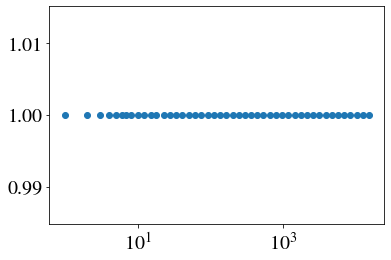

In [11]:
num = 50
T = sorted([6]+list(set(list(np.logspace(np.log10(15000),np.log10(1), num, dtype = int)))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [13]:
STN.run(*T,  maxsamp = 50, minsamp = 10)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327]
Analyzing sample number 5 for samplelength  15000 and  8 slices


In [16]:
STN.save()

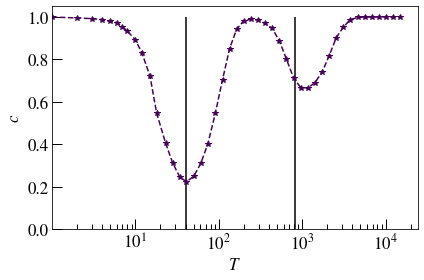

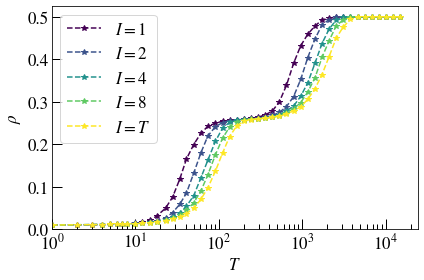

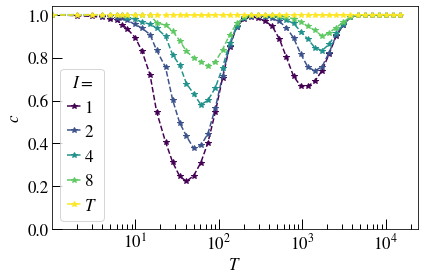

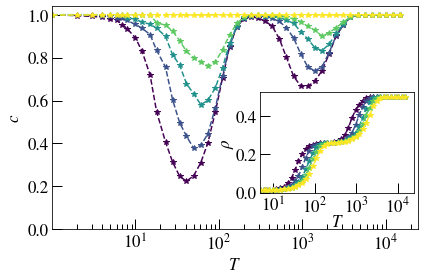

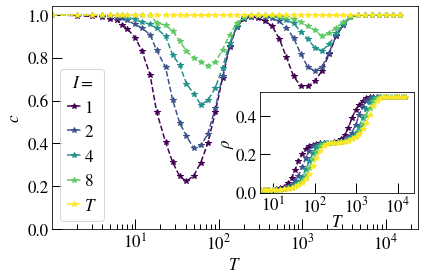

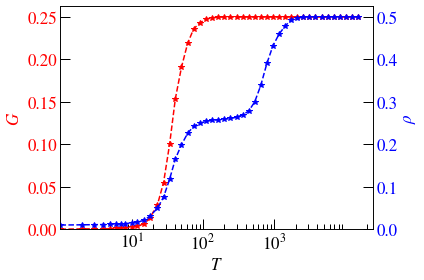

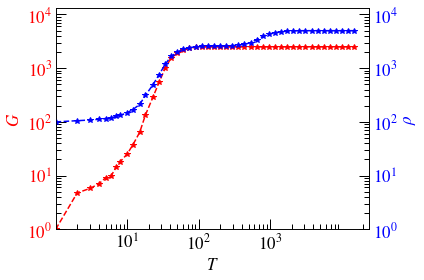

In [35]:
vline=[(STN.TC(50,0.001), "black", None),(STN.TC(50,0.00005), "black", None)]
STN.plot_cA0AT(sub = False,vline = vline)
STN.plot_PA(save ="SBM_rho")
STN.plot_cA0AT(legend = True, save = "SBM_c")
STN.plot_cA0AT(legend = False, rho = True, save = "SBM_c_rho")
STN.plot_cA0AT(legend = True, rho = True, save = "SBM_c_rho_legend")


STN.plot_LCC(ACC = True, save="SBM_G")
STN.plot_LCC(normalize = False, log=True, ACC = True, save="SBM_G_log")

